In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Load the dataset
df = pd.read_csv('nm.csv')
df.head()


,Time,Source,Destination,Protocol,Length,Source Port,Destination Port,bad_packet
0,0.000000,VMware_8a:60:5f,Broadcast,ARP,60,NaN,NaN,0
1,0.081233,VMware_8a:12:84,Broadcast,ARP,60,NaN,NaN,0
2,0.217863,VMware_8a:7e:e9,Broadcast,ARP,60,NaN,NaN,0
3,0.419426,VMware_8a:b2:34,Broadcast,ARP,60,NaN,NaN,0
4,0.559886,VMware_8a:4e:1c,Broadcast,ARP,60,NaN,NaN,0


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3245180 entries, 0 to 3245179
Data columns (total 8 columns):
 #   Column            Dtype  
---  ------            -----  
 0   Time              float64
 1   Source            object 
 2   Destination       object 
 3   Protocol          object 
 4   Length            int64  
 5   Source Port       float64
 6   Destination Port  float64
 7   bad_packet        int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 198.1+ MB


In [32]:
df.describe()

,Time,Length,Source Port,Destination Port,bad_packet
count,3.245180e+06,3.245180e+06,3462.000000,3462.000000,3.245180e+06
mean,2.780852e+01,4.303799e+01,16854.654535,39357.717504,9.986059e-01
std,5.040969e+00,3.871504e+01,25816.560068,26605.622671,3.731118e-02
min,0.000000e+00,4.200000e+01,137.000000,137.000000,0.000000e+00
25%,2.344227e+01,4.200000e+01,443.000000,443.000000,1.000000e+00
50%,2.786607e+01,4.200000e+01,443.000000,57912.000000,1.000000e+00
75%,3.216788e+01,4.200000e+01,57912.000000,57912.000000,1.000000e+00
max,3.617727e+01,2.420000e+03,57914.000000,57914.000000,1.000000e+00


In [33]:
df.shape

(3245180, 8)

In [34]:
print(df.isnull().sum())

Time                      0
Source                    0
Destination               0
Protocol                  0
Length                    0
Source Port         3241718
Destination Port    3241718
bad_packet                0
dtype: int64


In [35]:
df.drop(['Source Port', 'Destination Port'], axis=1, inplace=True)

In [36]:
print(df.isnull().sum())

Time           0
Source         0
Destination    0
Protocol       0
Length         0
bad_packet     0
dtype: int64


In [37]:
df.columns

Index(['Time', 'Source', 'Destination', 'Protocol', 'Length', 'bad_packet'], dtype='object')

In [38]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical columns
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_cols = encoder.fit_transform(df[['Source', 'Destination', 'Protocol']])

# Convert the encoded columns to a DataFrame
encoded_df = pd.DataFrame(encoded_cols.toarray(), columns=encoder.get_feature_names_out())

# Drop the original categorical columns
df.drop(['Source', 'Destination', 'Protocol'], axis=1, inplace=True)

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, encoded_df], axis=1)

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Time', 'Length', 'bad_packet', 'Source_142.251.32.14',
       'Source_192.167.1.235', 'Source_192.167.2.126', 'Source_192.167.3.73',
       'Source_192.167.4.123', 'Source_192.167.4.164', 'Source_192.167.4.188',
       'Source_192.167.5.22', 'Source_192.167.5.247', 'Source_192.167.5.35',
       'Source_192.167.6.52', 'Source_192.167.7.108', 'Source_192.167.9.105',
       'Source_192.167.9.21', 'Source_192.167.9.39', 'Source_192.167.9.41',
       'Source_192.232.16.204', 'Source_VMware_8a:0a:66',
       'Source_VMware_8a:12:84', 'Source_VMware_8a:25:c0',
       'Source_VMware_8a:31:5e', 'Source_VMware_8a:4e:1c',
       'Source_VMware_8a:5c:e6', 'Source_VMware_8a:60:5f',
       'Source_VMware_8a:7e:e9', 'Source_VMware_8a:7f:3f',
       'Source_VMware_8a:9d:21', 'Source_VMware_8a:aa:27',
       'Source_VMware_8a:b2:34', 'Destination_142.251.32.14',
       'Destination_192.167.255.255', 'Destination_192.167.5.22',
       'Destination_192.167.5.35', 'Destination_192.232.16.204',
       'Destination_Broadcast', 'Destination_VMware_8a:5c:e6',
       'Destination_VMware_8a:7f:3f', 'Destination_VMware_8a:aa:27',
       'Protocol_ARP', 'Protocol_BROWSER', 'Protocol_ICMP', 'Protocol_NBNS',
       'Protocol_TCP', 'Protocol_TLSv1.2']] = scaler.fit_transform(df[['Time', 'Length', 'bad_packet', 'Source_142.251.32.14',
       'Source_192.167.1.235', 'Source_192.167.2.126', 'Source_192.167.3.73',
       'Source_192.167.4.123', 'Source_192.167.4.164', 'Source_192.167.4.188',
       'Source_192.167.5.22', 'Source_192.167.5.247', 'Source_192.167.5.35',
       'Source_192.167.6.52', 'Source_192.167.7.108', 'Source_192.167.9.105',
       'Source_192.167.9.21', 'Source_192.167.9.39', 'Source_192.167.9.41',
       'Source_192.232.16.204', 'Source_VMware_8a:0a:66',
       'Source_VMware_8a:12:84', 'Source_VMware_8a:25:c0',
       'Source_VMware_8a:31:5e', 'Source_VMware_8a:4e:1c',
       'Source_VMware_8a:5c:e6', 'Source_VMware_8a:60:5f',
       'Source_VMware_8a:7e:e9', 'Source_VMware_8a:7f:3f',
       'Source_VMware_8a:9d:21', 'Source_VMware_8a:aa:27',
       'Source_VMware_8a:b2:34', 'Destination_142.251.32.14',
       'Destination_192.167.255.255', 'Destination_192.167.5.22',
       'Destination_192.167.5.35', 'Destination_192.232.16.204',
       'Destination_Broadcast', 'Destination_VMware_8a:5c:e6',
       'Destination_VMware_8a:7f:3f', 'Destination_VMware_8a:aa:27',
       'Protocol_ARP', 'Protocol_BROWSER', 'Protocol_ICMP', 'Protocol_NBNS',
       'Protocol_TCP', 'Protocol_TLSv1.2']])

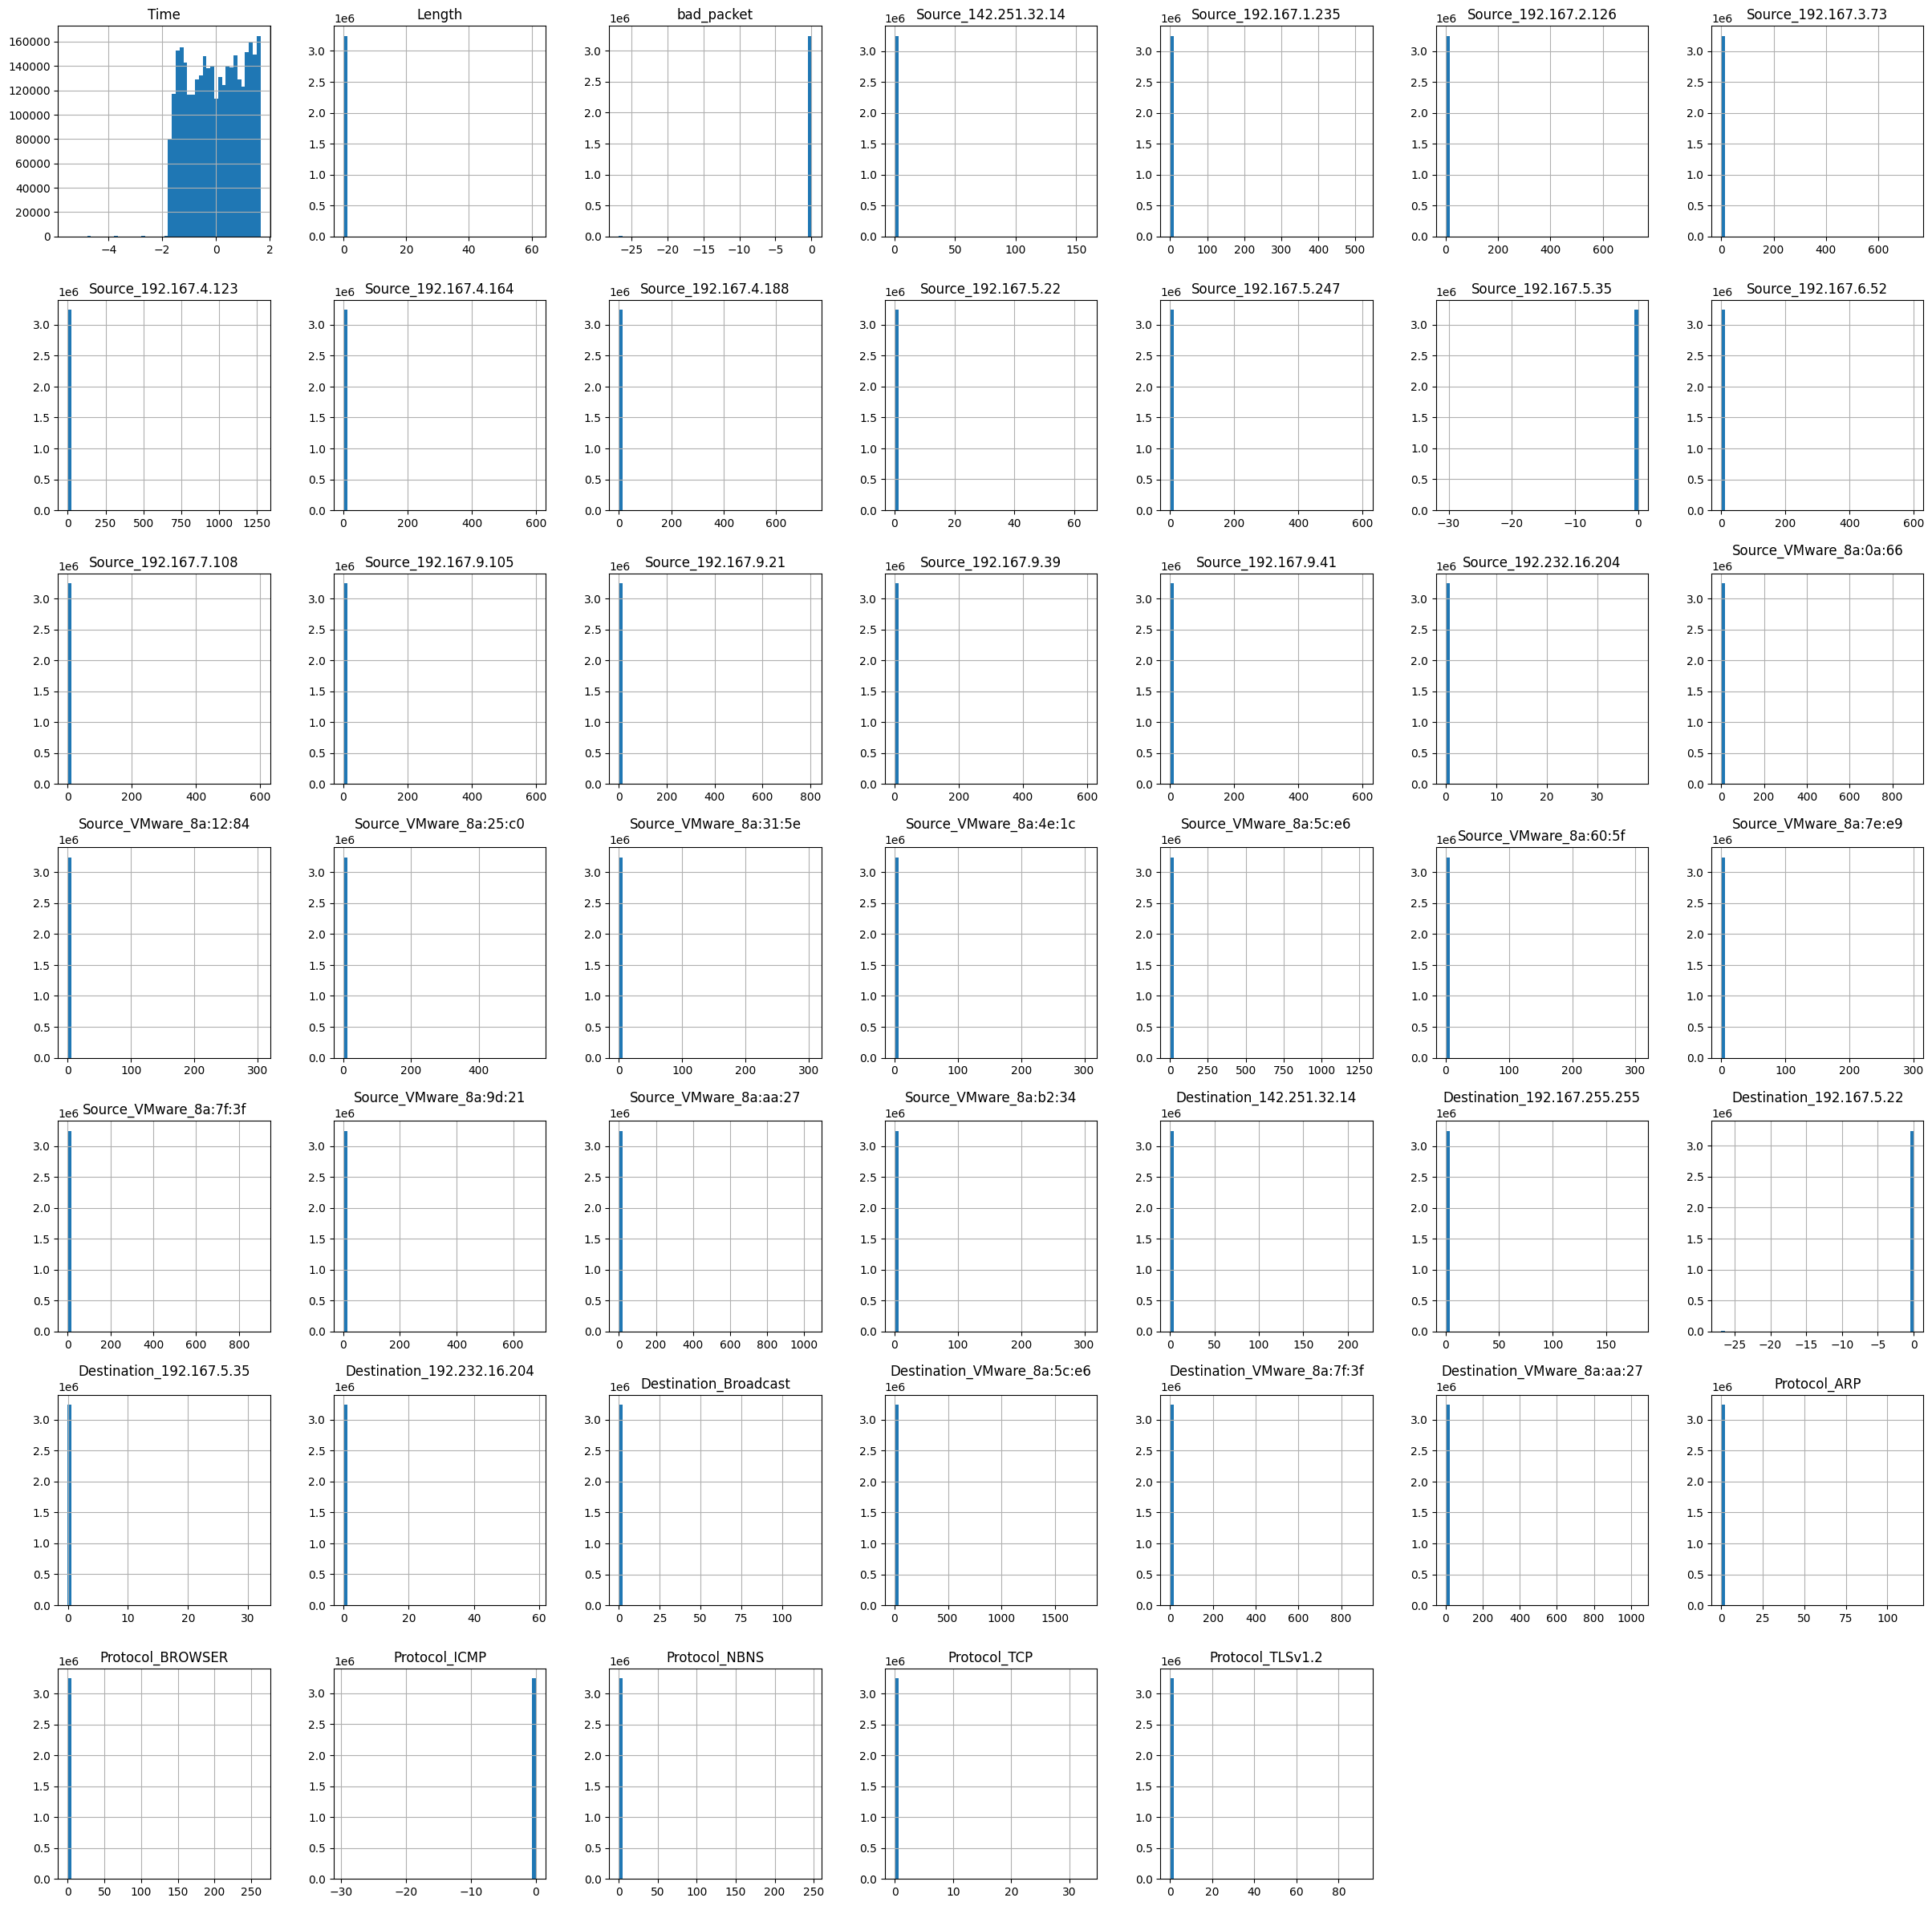

In [40]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(30, 30))
plt.show()

In [41]:
# Outlier Detection
from scipy import stats

for col in ['Time', 'Length', 'bad_packet', 'Source_142.251.32.14',
       'Source_192.167.1.235', 'Source_192.167.2.126', 'Source_192.167.3.73',
       'Source_192.167.4.123', 'Source_192.167.4.164', 'Source_192.167.4.188',
       'Source_192.167.5.22', 'Source_192.167.5.247', 'Source_192.167.5.35',
       'Source_192.167.6.52', 'Source_192.167.7.108', 'Source_192.167.9.105',
       'Source_192.167.9.21', 'Source_192.167.9.39', 'Source_192.167.9.41',
       'Source_192.232.16.204', 'Source_VMware_8a:0a:66',
       'Source_VMware_8a:12:84', 'Source_VMware_8a:25:c0',
       'Source_VMware_8a:31:5e', 'Source_VMware_8a:4e:1c',
       'Source_VMware_8a:5c:e6', 'Source_VMware_8a:60:5f',
       'Source_VMware_8a:7e:e9', 'Source_VMware_8a:7f:3f',
       'Source_VMware_8a:9d:21', 'Source_VMware_8a:aa:27',
       'Source_VMware_8a:b2:34', 'Destination_142.251.32.14',
       'Destination_192.167.255.255', 'Destination_192.167.5.22',
       'Destination_192.167.5.35', 'Destination_192.232.16.204',
       'Destination_Broadcast', 'Destination_VMware_8a:5c:e6',
       'Destination_VMware_8a:7f:3f', 'Destination_VMware_8a:aa:27',
       'Protocol_ARP', 'Protocol_BROWSER', 'Protocol_ICMP', 'Protocol_NBNS',
       'Protocol_TCP', 'Protocol_TLSv1.2']:
    z_scores = np.abs(stats.zscore(df[col]))
    outliers = df[(z_scores > 3) | (z_scores < -3)]
    print(f"Outliers in {col}: {len(outliers)}")

Outliers in Time: 1047
Outliers in Length: 2342
Outliers in bad_packet: 4524
Outliers in Source_142.251.32.14: 128
Outliers in Source_192.167.1.235: 12
Outliers in Source_192.167.2.126: 6
Outliers in Source_192.167.3.73: 6
Outliers in Source_192.167.4.123: 2
Outliers in Source_192.167.4.164: 9
Outliers in Source_192.167.4.188: 6
Outliers in Source_192.167.5.22: 786
Outliers in Source_192.167.5.247: 9
Outliers in Source_192.167.5.35: 3490
Outliers in Source_192.167.6.52: 9
Outliers in Source_192.167.7.108: 9
Outliers in Source_192.167.9.105: 9
Outliers in Source_192.167.9.21: 5
Outliers in Source_192.167.9.39: 9
Outliers in Source_192.167.9.41: 9
Outliers in Source_192.232.16.204: 2235
Outliers in Source_VMware_8a:0a:66: 4
Outliers in Source_VMware_8a:12:84: 35
Outliers in Source_VMware_8a:25:c0: 10
Outliers in Source_VMware_8a:31:5e: 35
Outliers in Source_VMware_8a:4e:1c: 35
Outliers in Source_VMware_8a:5c:e6: 2
Outliers in Source_VMware_8a:60:5f: 35
Outliers in Source_VMware_8a:7e:e9:

In [42]:
# Mean Packet Size: Calculate the average packet size in bytes.
df['Mean Packet Size'] = df['Length']

In [43]:
# Standard Deviation of Packet Size: Calculate the standard deviation of packet sizes.
df['Std Packet Size'] = df['Length'].rolling(window=10).std()

In [44]:
# Maximum Packet Size: Calculate the maximum packet size in bytes.
df['Max Packet Size'] = df['Length'].rolling(window=10).max()

In [45]:
# Minimum Packet Size: Calculate the minimum packet size in bytes.
df['Min Packet Size'] = df['Length'].rolling(window=10).min()

In [46]:
# Time Between Packets: Calculate the time difference between consecutive packets.
df['Time Between Packets'] = df['Time'].diff()

In [47]:
# Packet Rate: Calculate the number of packets per second.
df['Packet Rate'] = 1 / df['Time Between Packets']

In [48]:
# Inter-Arrival Time: Calculate the time difference between the current packet and the previous packet.
df['Inter-Arrival Time'] = df['Time'].diff()

In [55]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Create an imputer transformer to handle missing values
imputer = SimpleImputer(strategy='mean')

# Create a pipeline with the imputer and Isolation Forest model
pipeline = make_pipeline(imputer, if_model)

# Fit the pipeline to the data
pipeline.fit(df)

# Predict anomalies
anomaly_scores = pipeline.decision_function(df)
anomaly_labels = pipeline.predict(df)


In [57]:
df.dropna(inplace=True)

In [58]:
df.shape

(3245171, 54)

In [59]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
if_model = IsolationForest(contamination=0.1)

# Fit the model to the data
if_model.fit(df)

# Predict anomalies
anomaly_scores = if_model.decision_function(df)
anomaly_labels = if_model.predict(df)

In [60]:
from keras.models import Model
from keras.layers import Input, Dense

# Define the input layer
input_layer = Input(shape=(df.shape[1],))

# Define the encoder layers
x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)

# Define the decoder layers
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
x = Dense(df.shape[1], activation='sigmoid')(x)

# Create the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=x)

# Compile the model
autoencoder.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
autoencoder.fit(df, df, epochs=10, batch_size=256, verbose=0)

# Predict anomalies
reconstructions = autoencoder.predict(df)
anomaly_scores = np.mean(np.abs(df - reconstructions), axis=1)

101412/101412 ━━━━━━━━━━━━━━━━━━━━ 224s 2ms/step


In [ ]:
# Visual Inspection
import matplotlib.pyplot as plt

# Plot the original data
plt.plot(df)

# Highlight the detected anomalies
plt.scatter(bad_packet, df[bad_packet], color='red')

plt.show()